In [96]:
import numpy as np
import keras
import warnings
from matplotlib import pyplot as plt
import cv2
warnings.filterwarnings('ignore')

In [97]:
if False:
    filename = '/users/xjing/Desktop/GitHub/T-Mobile_Hackathon/finger/FiveOpen.MOV'
    vidcap = cv2.VideoCapture(filename)
    success,image = vidcap.read()
    count = 0
    success = True
    image_list = []
    while success:
        success,image = vidcap.read()
        #cv2.imwrite("frame%d.jpg" % count, image)
        if success:
            image_list += [np.rot90(image,-1)]
        if cv2.waitKey(10) == 27:
            break
        count += 1

In [102]:
def image_process(img,r_size,c_size):
    scaled_image = cv2.resize(img, (r_size, c_size))
    rot_image = np.rot90(scaled_image,-1)
    return rot_image

In [107]:
def extract_image_data(dire = dire, filename = filename,r_size=640,c_size=360):
    file = dire+ filename
    vidcap = cv2.VideoCapture(file)
    success,image = vidcap.read()
    flag = True
    image_list = []
    cnt = 0
    while flag:
        flag,img = vidcap.read()
        if flag:
            image_list += [image_process(img,r_size,c_size)]
            cnt += 1
    return np.asarray(image_list),np.asarray([filename.split('.')[0] for i in range(cnt)])

In [108]:
dire = '/users/xjing/Desktop/GitHub/T-Mobile_Hackathon/finger/'
filename = 'FiveOpen.MOV'
image_list,y_data = extract_image_data(dire,filename)

In [109]:
print(image_list[0].shape)
print(len(image_list))
print(y_data.shape)
print(y_data[0])

(640, 360, 3)
294
(294,)
FiveOpen


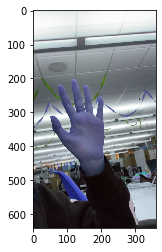

In [110]:
imgplot = plt.imshow(image_list[0])